In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [7]:
########################################################################################################

In [8]:
#Calculating the llc objective

# returns a vector of the same shape as z
def sigmoid(z):
    sig_result = np.exp(z)/(1 + np.exp(z))
    return sig_result

# X is dxn, y is 1xn, th is dx1, th0 is 1x1
def nll_loss(X, y, th, th0):
    nll_loss_Result = (y) * np.log(sigmoid(np.dot(th.T, X) + th0)) + (1 - y) * np.log(1 - sigmoid(np.dot(th.T, X) + th0))
    
    return  -1 * nll_loss_Result

# X is dxn, y is 1xn, th is dx1, th0 is 1x1, lam is a scalar
# returns a float for the llc objective over the dataset
def llc_obj(X, y, th, th0, lam):
    
    # y(label) data filtering
    #y.where(y != 1, y, 0)
    
    d_number, n_number = X.shape
    
    llc_obj_result = np.sum(nll_loss(X, y, th, th0))
    
    return llc_obj_result/n_number + lam*(np.linalg.norm(th)**2)

######## TEST ALL PASSED ########

In [9]:
#Calculating the gradients

# returns an array of the same shape as z for the gradient of sigmoid(z)
# Passed
def d_sigmoid(z):
    result = sigmoid(z) * (1- sigmoid(z))
    return result

# returns a (d,n) array for the gradient of nll_loss(X, y, th, th0) with respect to th for each data point
# Passed
def d_nll_loss_th(X, y, th, th0):
    result = (sigmoid(np.dot(th.T, X) + th0)-y)*X
    return result

# returns a (d,1) array for the gradient of llc_obj(X, y, th, th0) with respect to th
# Passed
def d_llc_obj_th(X, y, th, th0, lam):
    #y.where(y != 1, y, 0)
    d_number, n_number = X.shape  
    result =  np.add(np.sum((sigmoid(np.dot(th.T, X) + th0)-y) * X, axis = 1)[np.newaxis].T / n_number, 2*lam*th)
    
    return result

# returns a (d+1, 1) array for the full gradient as a single vector (which includes both th, th0)
# Passed
def llc_obj_grad(X, y, th, th0, lam):

    d_number, n_number = X.shape
    d_llc_obj_th_result = d_llc_obj_th(X, y, th, th0, lam)  
    result =  np.sum(sigmoid(np.dot(th.T, X) + th0)-y) / n_number
    return np.append(d_llc_obj_th_result, result[np.newaxis][np.newaxis], axis=0)

In [10]:
def llc_GD(data, labels, lam, save):
    def llc_min_step_size_fn(i):
       return 2/(i+1)**0.5
    d_number, n_number = data.shape  
    th = np.zeros((d_number,1))
    th0 = np.array([0])
    t = 0
    
    while t < 10000:
        t = t+1
        oldth = th
        oldth0 = th0
        oldth_grad = llc_obj_grad(data, labels, th, th0, lam)[0:d_number,:]
        oldth0_grad =  llc_obj_grad(data, labels, th, th0, lam)[-1,0]
        
        th = th - llc_min_step_size_fn(t) * oldth_grad
        th0 = th0 - llc_min_step_size_fn(t) * oldth0_grad
        if (save == True):
            SaveGraphAnimationImages (th, th0, data, labels, t, 7, 12)
        if np.abs(llc_obj(data, labels, th, th0, lam) - llc_obj(data, labels, oldth, oldth0, lam)) < 0.0001:
            print("Accurate Enough")
            break
    ShowGraph (th, th0, dataset_features, dataset_labels, d_titles, 7, 12)
    print("Not Accurate Enough")
    return [th, th0]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_45192\3810034354.py:10: RuntimeWarning: divide by zero encountered in log
  nll_loss_Result = (y) * np.log(sigmoid(np.dot(th.T, X) + th0)) + (1 - y) * np.log(1 - sigmoid(np.dot(th.T, X) + th0))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_45192\3810034354.py:10: RuntimeWarning: invalid value encountered in multiply
  nll_loss_Result = (y) * np.log(sigmoid(np.dot(th.T, X) + th0)) + (1 - y) * np.log(1 - sigmoid(np.dot(th.T, X) + th0))


Accurate Enough
Not Accurate Enough


<Figure size 432x288 with 0 Axes>

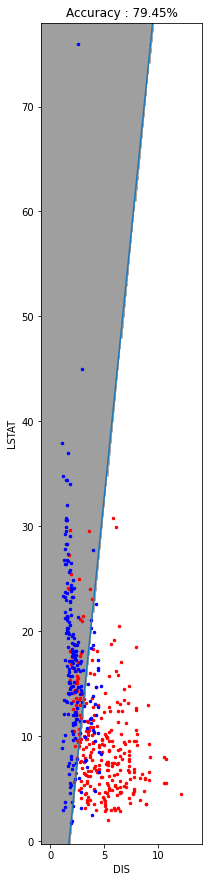

In [11]:
def DataOrganize(Dataset, XOne_Coluumn_Int, XTwo_Coluumn_Int):
    dataset_features = Dataset[:,0:-1]
    dataset_labels = Dataset[:,-1:]
    
    dataset_labels_filttered = np.where(dataset_labels == 1, dataset_labels, 0)
    
    xOne_Data = dataset_features[:, XOne_Coluumn_Int:XOne_Coluumn_Int+1]
    xTwo_Data = dataset_features[:, XTwo_Coluumn_Int:XTwo_Coluumn_Int+1]    
    
    dataset_selected = np.concatenate((xOne_Data,xTwo_Data),axis = 1)
    
    Selected_features =dataset_selected
    
    return Selected_features.T, dataset_labels_filttered.T


def SaveGraphAnimationImages (Result_th, Result_thZero, X, y, iteration, colone, coltwo):
    dataset_features = X.T
    dataset_labels = y
    
    xOne_Data = X[0]
    xTwo_Data = X[1]
    
    PredResolution = 10 #should be Natural Number.
    PredxOne = int((np.amax(xOne_Data) - np.amin(xOne_Data) + 4) * PredResolution)
    PredxTwo = int((np.amax(xTwo_Data) - np.amin(xTwo_Data) + 4) * PredResolution)            
    PredBackground = np.zeros((PredxOne, PredxTwo))
    
    for i in range(PredxOne):
        for j in range(PredxTwo):
            xOne_small = np.amin(xOne_Data) -2 + i / PredResolution
            xTwo_small =  np.amin(xTwo_Data) -2 + j / PredResolution
            
            Xdata_small = np.array([[xOne_small], [xTwo_small]])
            
            #print(Result_th.T)
            
            PredBackground[i,j] = np.sign(np.dot(Result_th.T, Xdata_small) + Result_thZero)
            
    NegPred = np.array(np.where(PredBackground == -1)).T
    NegPred = (NegPred/PredResolution + [np.amin(xOne_Data)-2, np.amin(xTwo_Data)-2])
    
    xOne = np.linspace(-1000,3500)
    xTwo = -1*(xOne*Result_th[0,0]+ Result_thZero[0])/Result_th[1,0]
    
    #####   Accuracy Calculation   #####
    y_Predicted = np.sign(np.dot(Result_th.T, X) + Result_thZero)
    y_True_filtered = np.where(dataset_labels == 1, dataset_labels, -1)
    y_wrongs = y_Predicted - y_True_filtered
    y_wrongs_filtered = np.where(y_wrongs == 0, y_wrongs, 1)
    accuracy_percent = round(1 - np.sum(y_wrongs_filtered)/np.size(y_wrongs_filtered), 4) * 100
    ##### Accuracy Calculation End #####
    positive_features = dataset_features[np.where(dataset_labels[0,:] == 1.)]
    negative_features = dataset_features[np.where(dataset_labels[0,:] == 0.)]
    
    plt.clf()
    
    f = plt.figure()
    xOneLength = np.amax(xOne_Data) - np.amin(xOne_Data)+4
    xTwoLength = np.amax(xTwo_Data) - np.amin(xTwo_Data)+4   
    xOneLRatio = xOneLength/(xOneLength + xTwoLength)
    xTwoLRatio = xTwoLength/(xOneLength + xTwoLength)
    plotSizeMult = 18
    f.set_figwidth(xOneLRatio * plotSizeMult)
    f.set_figheight(xTwoLRatio * plotSizeMult)
    #Size of Plot_End

    plt.axis([np.amin(xOne_Data)-2, np.amax(xOne_Data)+2, np.amin(xTwo_Data)-2, np.amax(xTwo_Data)+2])
    plt.plot(NegPred[:,0], NegPred[:,1], '#9f9f9f', marker="s", linestyle='none', markersize= 1000/PredResolution/72)
    plt.title("Accuracy : " + str(accuracy_percent) + "%")
    plt.xlabel(d_titles[colone])
    plt.ylabel(d_titles[coltwo])
    plt.plot(positive_features[:,0], positive_features[:,1], 'ro', markersize=2.5)
    plt.plot(negative_features[:,0], negative_features[:,1], 'bo', markersize=2.5)
    plt.plot(xOne, xTwo)
    plt.axis([np.min(dataset_features[:,0] - 2), np.max(dataset_features[:,0] + 2), np.min(dataset_features[:,1] - 2), np.max(dataset_features[:,1] + 2)])
    plt.savefig("E:\_Github\ML_LLCandSGD\images\lcResult"+ str(iteration) +'.png')
    
    
def ShowGraph (Result_th, Result_thZero, X, y, d_titles, colone, coltwo):
    dataset_features = X.T
    dataset_labels = y
    
    xOne_Data = X[0]
    xTwo_Data = X[1]
    
    PredResolution = 10 #should be Natural Number.
    PredxOne = int((np.amax(xOne_Data) - np.amin(xOne_Data) + 4) * PredResolution)
    PredxTwo = int((np.amax(xTwo_Data) - np.amin(xTwo_Data) + 4) * PredResolution)            
    PredBackground = np.zeros((PredxOne, PredxTwo))
    
    for i in range(PredxOne):
        for j in range(PredxTwo):
            xOne_small = np.amin(xOne_Data) -2 + i / PredResolution
            xTwo_small =  np.amin(xTwo_Data) -2 + j / PredResolution
            
            Xdata_small = np.array([[xOne_small], [xTwo_small]])
            
            #print(Result_th.T)
            
            PredBackground[i,j] = np.sign(np.dot(Result_th.T, Xdata_small) + Result_thZero)
            
    NegPred = np.array(np.where(PredBackground == -1)).T
    NegPred = (NegPred/PredResolution + [np.amin(xOne_Data)-2, np.amin(xTwo_Data)-2])
    
    xOne = np.linspace(-1000,3500)
    xTwo = -1*(xOne*Result_th[0,0]+ Result_thZero[0])/Result_th[1,0]
    
    #####   Accuracy Calculation   #####
    y_Predicted = np.sign(np.dot(Result_th.T, X) + Result_thZero)
    y_True_filtered = np.where(dataset_labels == 1, dataset_labels, -1)
    y_wrongs = y_Predicted - y_True_filtered
    y_wrongs_filtered = np.where(y_wrongs == 0, y_wrongs, 1)
    accuracy_percent = round(1 - np.sum(y_wrongs_filtered)/np.size(y_wrongs_filtered), 4) * 100
    ##### Accuracy Calculation End #####
    
    positive_features = dataset_features[np.where(dataset_labels[0,:] == 1.)]
    negative_features = dataset_features[np.where(dataset_labels[0,:] == 0.)]
    
    plt.clf()
    
    f = plt.figure()
    xOneLength = np.amax(xOne_Data) - np.amin(xOne_Data)+4
    xTwoLength = np.amax(xTwo_Data) - np.amin(xTwo_Data)+4   
    xOneLRatio = xOneLength/(xOneLength + xTwoLength)
    xTwoLRatio = xTwoLength/(xOneLength + xTwoLength)
    plotSizeMult = 18
    f.set_figwidth(xOneLRatio * plotSizeMult)
    f.set_figheight(xTwoLRatio * plotSizeMult)
    #Size of Plot_End

    plt.axis([np.amin(xOne_Data)-2, np.amax(xOne_Data)+2, np.amin(xTwo_Data)-2, np.amax(xTwo_Data)+2])
    plt.plot(NegPred[:,0], NegPred[:,1], '#9f9f9f', marker="s", linestyle='none', markersize= 1000/PredResolution/72)
    plt.title("Accuracy : " + str(accuracy_percent) + "%")
    plt.xlabel(d_titles[colone])
    plt.ylabel(d_titles[coltwo])
    plt.plot(positive_features[:,0], positive_features[:,1], 'ro', markersize=2.5)
    plt.plot(negative_features[:,0], negative_features[:,1], 'bo', markersize=2.5)
    plt.plot(xOne, xTwo)
    plt.axis([np.min(dataset_features[:,0] - 2), np.max(dataset_features[:,0] + 2), np.min(dataset_features[:,1] - 2), np.max(dataset_features[:,1] + 2)])

with open('E:\\_Github\\ML_LLCandSGD\\RealEstateDataSetBoston.csv', newline = '', encoding="utf-8-sig") as file:
    reader = csv.reader(file,
                        quoting = csv.QUOTE_ALL,
                        delimiter = ' ')
     
    # storing all the rows in an output list
    output = []
    for row in reader:
        output.append(row[:][0].split(","))

d_titles = np.asarray(output[0])
dataset = np.asarray(output[1:]).astype(float)

#Choose two Columns of csv
dataset_features, dataset_labels = DataOrganize(dataset, 7, 12)

Result_th_th0 = llc_GD(dataset_features, dataset_labels, 0.0001, False)
